Load Julia packages (libraries) needed

In [20]:
using StatisticalRethinking

### snippet 2.6t

Define the data

In [21]:
k = 6
n = 9

9

Define the model

In [22]:
@model globe_toss(n, k) = begin
  theta ~ Beta(1, 1) # prior
  k ~ Binomial(n, theta) # model
  return k, theta
end

globe_toss (generic function with 3 methods)

Compute the maximum_a_posteriori value
Set search bounds

In [23]:
lb = [0.0]
ub = [1.0]

1-element Array{Float64,1}:
 1.0

Create (compile) the model

In [24]:
model = globe_toss(n, k)

globe_toss_model (generic function with 4 methods)

Compute the maximum_a_posteriori

In [25]:
result = maximum_a_posteriori(model, lb, ub)

Results of Optimization Algorithm
 * Algorithm: Fminbox with L-BFGS
 * Starting Point: [0.1910623272246095]
 * Minimizer: [0.6666666664881908]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 1.58e-07 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 3.92e-13 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 6.48e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 61
 * Gradient Calls: 61

Use Turing mcmc

In [34]:
chn = sample(model, NUTS(1000, 0.65));

┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/dev/Turing/src/samplers/support/hmc_core.jl:246
[NUTS{Any}] found initial ϵ: 3.2
└ @ Turing /Users/rob/.julia/dev/Turing/src/samplers/support/hmc_core.jl:291
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/dev/Turing/src/core/ad.jl:114
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/dev/Turing/src/core/ad.jl:115
[NUTS] Sampling... 35%  ETA: 0:00:02
  ϵ:         0.011164458359572256
  α:         1.0
4m  pre_cond:  [0.360088]┌ Info:  Adapted ϵ = 0.24995915825237894, std = [0.367206]; 500 iterations is used for adaption.
└ @ Turing /Users/rob/.julia/dev/Turing/src/samplers/adapt/adapt.jl:87





[NUTS] Finished with
  Running time        = 1.7801738539999996;
  #lf / sample        = 0.007;
  #evals / sample     = 43.079;
  pre-cond. metric    = [0.367206].


[NUTS] Sampling...100% Time: 0:00:02


Look at the generated draws (in chn)

2-element Array{Float64,1}:
 0.6649033385733655
 0.6793739878739313


Summary Stats:
Mean:           0.638566
Minimum:        0.217322
1st Quartile:   0.537932
Median:         0.649492
3rd Quartile:   0.746867
Maximum:        0.932826
Length:         1000
Type:           Float64




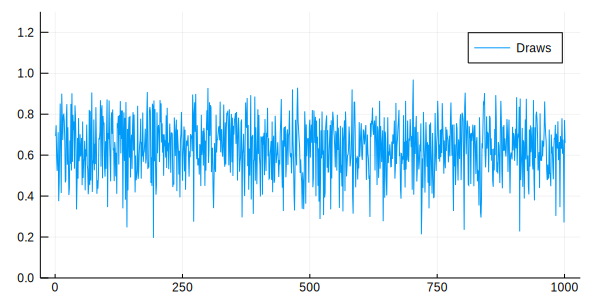

In [27]:
println()
describe(chn[:theta])
println()
MCMCChain.hpd(chn[:theta], alpha=0.945) |> display
println()

p_grid = range(0, step=0.001, stop=1)
prior = ones(length(p_grid))
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]
posterior = likelihood .* prior
posterior = posterior / sum(posterior)
samples = sample(p_grid, Weights(posterior), length(p_grid))

p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)
p[1] = plot(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

Analytical calculation

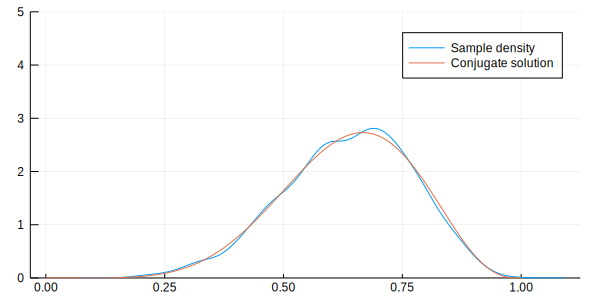

In [28]:
w = 6
n = 9
x = 0:0.01:1
p[2] = density(samples, ylim=(0.0, 5.0), lab="Sample density")
plot!(p[2], x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

Quadratic approximation

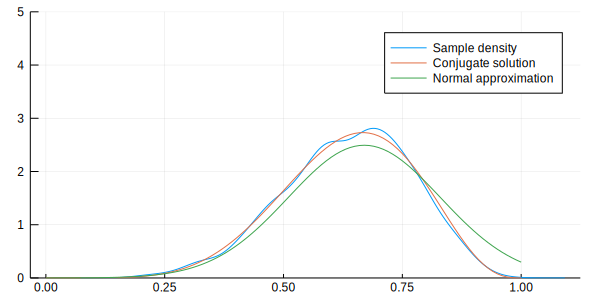

In [29]:
plot!( p[2], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

Show plots

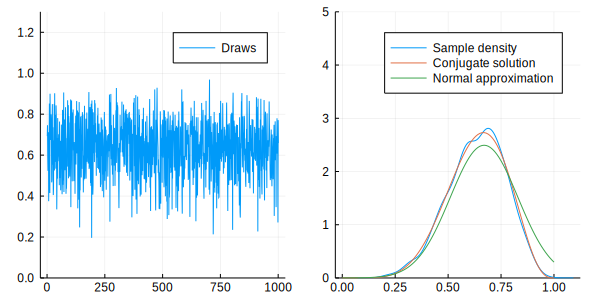

In [30]:
plot(p..., layout=(1, 2))

### snippet 2.7

analytical calculation

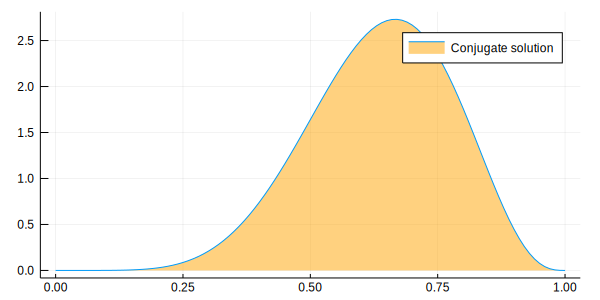

In [31]:
w = 6
n = 9
x = 0:0.01:1
plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), fill=(0, .5,:orange), lab="Conjugate solution")

quadratic approximation

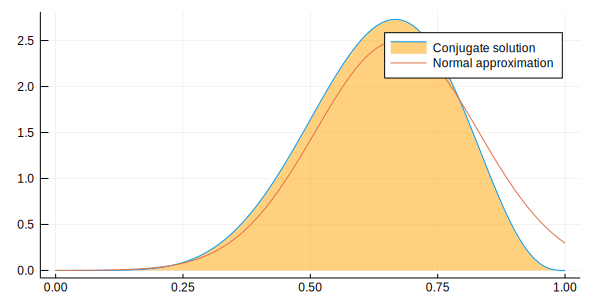

In [32]:
plot!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

Turing Chain

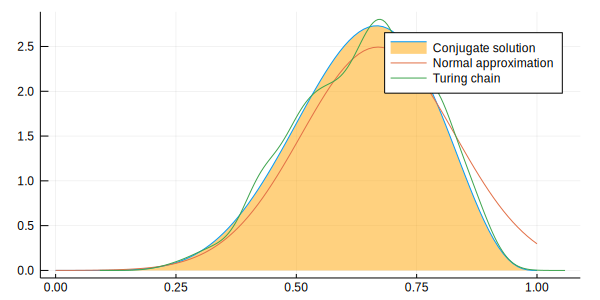

In [33]:
density!(chn[:theta], lab="Turing chain")

### snippet 2.8

The example is in `stan_globe_toss.jl`. It will be in `clips_02_08_08s.jl`.

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*